In [9]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tqqq = yf.Ticker("TQQQ")

In [3]:
tqqq_hist = tqqq.history(period="max")

In [4]:
tqqq_hist = tqqq_hist.reset_index()

In [5]:
tqqq_hist.index.to_numpy()

array([   0,    1,    2, ..., 2768, 2769, 2770])

In [6]:
import GPy

In [45]:
def mean_func(x):
	return np.exp(0.0014*x)

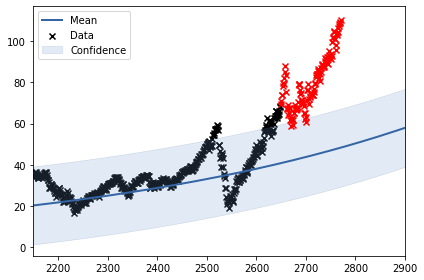

In [46]:
ratio = 0.956
length = len(tqqq_hist)
train = int(ratio*length)
train_up, train_low = train, train-500

mf = GPy.core.Mapping(1,1)
mf.f = lambda x: mean_func(x)
mf.update_gradients = lambda a,b: None

x = tqqq_hist.index.to_numpy().reshape(-1,1)
y = tqqq_hist["High"].to_numpy().reshape(-1,1)


x_train = x[train_low:train_up]
y_train = y[train_low:train_up]

kernel = GPy.kern.PeriodicExponential(1)
model = GPy.models.GPRegression(x_train, y_train, mean_function=mf, kernel=kernel)

model.optimize()
model.plot(plot_limits=[train_low,2900])
plt.scatter(x[train_up:], y[train_up:], marker="x", color='red')
